In [203]:
# Rank players by market value.

# I just import everything at the beginning and DL my csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os



from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from scipy.special import inv_boxcox

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/Users/accountmanager/Desktop/fifa21_male2.csv')
df

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [204]:
pd.set_option('display.max_rows',300) # To see a bit more

In [205]:
# Describe() at the very beginning to have just an idea of what the data looks like

df.describe()

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
count,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,...,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000,17125.000000
mean,219388.716204,25.272934,66.965022,67.900204,72.489810,5.524788,258.537752,51.621314,47.956672,53.598832,...,15.514277,15.738628,1631.256175,361.372146,68.091620,54.967299,58.926540,64.209869,50.266102,64.910715
std,37499.197507,4.942665,6.864329,6.637538,5.769949,5.787539,72.255687,17.875715,19.391547,16.947164,...,16.406064,17.130908,260.357024,40.252290,11.147116,13.877605,10.186728,9.832734,16.853801,9.660260
min,2.000000,16.000000,38.000000,42.000000,47.000000,-1.000000,33.000000,6.000000,3.000000,5.000000,...,1.000000,1.000000,731.000000,228.000000,25.000000,16.000000,25.000000,28.000000,12.000000,27.000000
25%,204082.000000,21.000000,62.000000,64.000000,69.000000,0.000000,232.000000,41.000000,33.000000,46.000000,...,8.000000,8.000000,1492.000000,333.000000,62.000000,46.000000,52.000000,59.000000,35.000000,59.000000
50%,228961.000000,25.000000,67.000000,68.000000,72.000000,4.000000,271.000000,56.000000,52.000000,57.000000,...,11.000000,11.000000,1659.000000,362.000000,69.000000,58.000000,60.000000,65.000000,53.000000,66.000000
75%,243911.000000,29.000000,72.000000,72.000000,76.000000,9.000000,306.000000,65.000000,64.000000,65.000000,...,14.000000,14.000000,1812.000000,390.000000,75.000000,65.000000,66.000000,71.000000,64.000000,72.000000
max,259105.000000,53.000000,93.000000,93.000000,95.000000,26.000000,437.000000,94.000000,95.000000,93.000000,...,93.000000,90.000000,2316.000000,498.000000,96.000000,93.000000,93.000000,95.000000,91.000000,93.000000


In [206]:
df.columns = [column.lower().replace(' ', '_') for column in df.columns]
df.columns

Index(['id', 'name', 'age', 'ova', 'nationality', 'club', 'bov', 'bp',
       'position', 'player_photo',
       ...
       'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'gender'],
      dtype='object', length=107)

In [207]:
for i in df.columns:
    print(i)

id
name
age
ova
nationality
club
bov
bp
position
player_photo
club_logo
flag_photo
pot
team_&_contract
height
weight
foot
growth
joined
loan_date_end
value
wage
release_clause
contract
attacking
crossing
finishing
heading_accuracy
short_passing
volleys
skill
dribbling
curve
fk_accuracy
long_passing
ball_control
movement
acceleration
sprint_speed
agility
reactions
balance
power
shot_power
jumping
stamina
strength
long_shots
mentality
aggression
interceptions
positioning
vision
penalties
composure
defending
marking
standing_tackle
sliding_tackle
goalkeeping
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes
total_stats
base_stats
w/f
sm
a/w
d/w
ir
pac
sho
pas
dri
def
phy
hits
ls
st
rs
lw
lf
cf
rf
rw
lam
cam
ram
lm
lcm
cm
rcm
rm
lwb
ldm
cdm
rdm
rwb
lb
lcb
cb
rcb
rb
gk
gender


In [208]:
df = df.set_index('id')
df

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
id,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,https://cdn.sofifa.com/teams/112516/light_60.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male


In [209]:
cat = df.select_dtypes('object')
cat

,name,nationality,club,bp,position,player_photo,club_logo,flag_photo,team_&_contract,height,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
id,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,Italy,Udinese,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,Udinese 2008 ~ 2016,"6'0""",...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,Spain,KAS Eupen,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,KAS Eupen 2014 ~ 2019,"5'10""",...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,England,Coventry City,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Coventry City 2016 ~ 2020,"5'9""",...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,Trinidad &amp; Tobago,Sunderland,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,Sunderland 2009,"5'11""",...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,Spain,Vissel Kobe,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,Vissel Kobe 2018 ~ 2021,"5'7""",...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,A. Medioub,France,CD Tondela,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,https://cdn.sofifa.com/teams/112516/light_60.png,https://cdn.sofifa.com/flags/fr.png,"CD Tondela Jun 30, 2021 On Loan","6'6""",...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
259090,W. Rickard,Wales,Burnley,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-wls.png,Burnley 2020 ~ 2021,"5'10""",...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
259091,C. Barrett,England,Burnley,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,Burnley 2020 ~ 2022,"5'9""",...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male


In [210]:
num = df.select_dtypes('number')
num

,age,ova,bov,pot,growth,attacking,crossing,finishing,heading_accuracy,short_passing,...,gk_positioning,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy
id,,,,,,,,,,,,,,,,,,,,,
2,33,69,71,69,0,313,75,50,59,71,...,10,12,1929,408,71,59,70,71,68,69
16,37,71,70,71,0,337,68,64,61,76,...,11,11,1906,385,53,69,73,69,58,63
27,33,71,71,71,0,337,80,64,41,77,...,16,7,1770,354,45,68,76,77,36,52
36,36,68,70,82,14,264,54,70,60,80,...,21,21,1348,369,61,66,66,69,47,60
41,36,81,82,81,0,367,75,69,54,90,...,13,7,2014,420,58,70,85,85,63,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,22,64,66,69,5,197,35,23,66,47,...,5,7,1367,302,54,30,37,48,64,69
259090,18,56,58,66,10,248,50,43,50,64,...,12,11,1529,319,62,46,57,56,43,55
259091,18,56,56,67,11,218,55,34,53,42,...,12,8,1430,303,63,35,44,52,54,55


In [211]:
for column in cat.columns:
    print(df[column].value_counts())

J. Rodríguez       10
A. Traoré           8
J. Rojas            8
J. Jones            7
Paulinho            7
                   ..
F. Ondoa            1
K. Opare            1
T. Abe              1
N. Stark            1
Pablo Rodríguez     1
Name: name, Length: 16176, dtype: int64
England                     1707
Germany                     1154
Spain                       1121
France                       990
Brazil                       857
Argentina                    778
Italy                        565
Netherlands                  475
Portugal                     365
United States                358
Mexico                       345
Uruguay                      335
Colombia                     305
Japan                        295
Poland                       291
Scotland                     281
Republic of Ireland          278
Belgium                      263
Norway                       260
Sweden                       260
Denmark                      258
Austria                  

In [212]:
df['hits'] = df['hits'].apply(lambda x: float(str(x).replace('.', '').replace("K", '000')))


In [213]:
for column in num.columns:
    print(df[column].value_counts())

22    1322
23    1307
21    1267
20    1255
24    1227
25    1109
26    1087
28    1033
27    1026
19    1012
29     872
30     769
31     669
18     662
32     575
33     505
34     394
17     288
35     262
36     174
37     111
38      73
16      45
39      39
40      21
42       9
41       8
43       2
47       1
53       1
Name: age, dtype: int64
67    1018
65    1010
64    1009
66     975
68     943
69     926
70     914
63     864
72     820
71     792
62     757
73     645
61     636
75     626
60     581
74     549
59     473
58     398
76     376
77     333
57     322
78     255
56     251
55     227
79     205
80     158
54     151
53     146
52     115
81     108
51      91
83      81
82      75
50      68
84      43
49      40
85      39
48      23
87      23
86      18
88      11
47       9
90       6
89       6
91       4
42       1
38       1
93       1
92       1
45       1
Name: ova, dtype: int64
67    1062
66    1031
68    1025
65    1023
69     998
70     971
64    

In [214]:
# some cleaning

df['height'] = df['height'].apply(lambda x: float(str(x).replace('"', '').replace("'", ".")))
df['height']

id
2         6.00
16        5.10
27        5.90
36        5.11
41        5.70
          ... 
259088    6.60
259090    5.10
259091    5.90
259101    5.90
259105    5.10
Name: height, Length: 17125, dtype: float64

In [215]:
df['weight'] = df['weight'].apply(lambda x: float(str(x).replace('lbs', '')))
df['weight']

id
2         181.0
16        143.0
27        161.0
36        165.0
41        150.0
          ...  
259088    165.0
259090    170.0
259091    154.0
259101    148.0
259105    154.0
Name: weight, Length: 17125, dtype: float64

In [216]:
df['wage'] = df['wage'].apply(lambda x: float(str(x).replace('€', '').replace('K','000').replace('M','000000').replace('.','')))
df['wage']

id
2          7000.0
16         7000.0
27        15000.0
36            0.0
41        12000.0
           ...   
259088     2000.0
259090     3000.0
259091     2000.0
259101     3000.0
259105     2000.0
Name: wage, Length: 17125, dtype: float64

In [217]:
df['release_clause'] = df['release_clause'].apply(lambda x: float(str(x).replace('€', '').replace('K','000').replace('M','000000').replace('.','')))

In [161]:
df['sm'] = df['sm'].apply(lambda x: float(str(x).replace(' ', '').replace('★','')))
df['w/f'] = df['w/f'].apply(lambda x: float(str(x).replace(' ', '').replace('★','')))
df['ir'] = df['ir'].apply(lambda x: float(str(x).replace(' ', '').replace('★','')))

In [218]:
df['value'] = df['value'].apply(lambda x: float(str(x).replace('€', '').replace('K','000').replace('M','000000').replace('.','').replace('.0','')))
df['value']

id
2           625000.0
16          600000.0
27        11000000.0
36               0.0
41        55000000.0
             ...    
259088      550000.0
259090      130000.0
259091      130000.0
259101      475000.0
259105      325000.0
Name: value, Length: 17125, dtype: float64

In [219]:
# cheking the nulls - proportion of nulls is quite low so ill let it like that except for the loean date end -
# - where I think it is better to just drop the column
df.isna().sum()

name                    0
age                     0
ova                     0
nationality             0
club                   23
bov                     0
bp                      0
position              413
player_photo            0
club_logo              23
flag_photo              0
pot                     0
team_&_contract         0
height                  0
weight                  0
foot                    0
growth                  0
joined                 58
loan_date_end       16215
value                   0
wage                    0
release_clause          0
contract                0
attacking               0
crossing                0
finishing               0
heading_accuracy        0
short_passing           0
volleys                58
skill                   0
dribbling               0
curve                  58
fk_accuracy             0
long_passing            0
ball_control            0
movement                0
acceleration            0
sprint_speed            0
agility     

In [220]:
df1 = df.drop('loan_date_end', axis=1)

In [221]:
df2 = df1.dropna() #  to avoid having to remember in which copy number I'm at
df1

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
id,,,,,,,,,,,,,,,,,,,,,
2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,https://cdn.sofifa.com/teams/112516/light_60.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male


<AxesSubplot:xlabel='ova', ylabel='Density'>

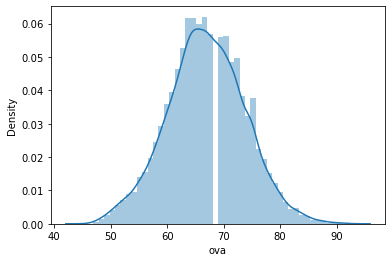

In [222]:
# I dont plot all of them because it would be in my opinion useless and impossible to read
# And we can see outliers which can be interested to keep because we know that there is a lot disparity in term of -
# - wages in football
# I prefer to keep them all int this first try - doesnt work for the predictions : infinity or a value too large for dtype('float64')

sns.distplot(df2['ova'])

<AxesSubplot:xlabel='value', ylabel='Density'>

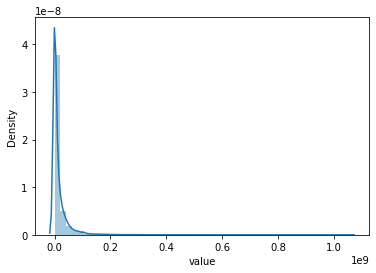

In [223]:
sns.distplot(df2['value'])

<AxesSubplot:xlabel='height', ylabel='Density'>

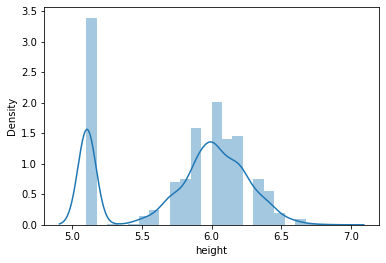

In [224]:
sns.distplot(df2['height'])

In [225]:
# I'd say in my opinion, it is hard to read. Nevertheless we can see that the correlation in general isnt really strong

df2.corr()

,age,ova,bov,pot,height,weight,growth,value,wage,release_clause,...,gk_reflexes,total_stats,base_stats,pac,sho,pas,dri,def,phy,hits
age,1.000000,0.524508,0.464624,-0.249234,0.058954,0.247819,-0.864711,0.109997,0.207200,0.098743,...,0.114080,0.297379,0.430831,-0.143078,0.306638,0.395206,0.252437,0.228268,0.450579,-0.041690
ova,0.524508,1.000000,0.986274,0.586464,0.025569,0.148856,-0.603919,0.529343,0.595311,0.591154,...,0.037180,0.615636,0.837454,0.215014,0.486540,0.701312,0.648621,0.348560,0.549330,0.090793
bov,0.464624,0.986274,1.000000,0.622311,0.019724,0.131534,-0.552434,0.535186,0.595491,0.600054,...,-0.009544,0.643227,0.833765,0.223757,0.478225,0.691311,0.644454,0.353400,0.542273,0.096389
pot,-0.249234,0.586464,0.622311,1.000000,0.002234,-0.041143,0.291411,0.460435,0.468083,0.536601,...,-0.003399,0.332721,0.471870,0.256589,0.243849,0.396498,0.444143,0.172836,0.159153,0.145121
height,0.058954,0.025569,0.019724,0.002234,1.000000,0.463497,-0.028000,0.006124,0.018761,0.011227,...,0.275449,-0.292679,-0.105546,-0.263443,-0.065839,-0.147207,-0.207908,0.041460,0.246472,-0.007327
weight,0.247819,0.148856,0.131534,-0.041143,0.463497,1.000000,-0.216289,0.045824,0.071483,0.038197,...,0.319520,-0.243247,0.006772,-0.338476,0.004050,-0.101703,-0.206473,0.105591,0.538855,-0.020908
growth,-0.864711,-0.603919,-0.552434,0.291411,-0.028000,-0.216289,1.000000,-0.172080,-0.242464,-0.170129,...,-0.047255,-0.399669,-0.524713,-0.001443,-0.334657,-0.438095,-0.328981,-0.241580,-0.492157,0.035576
value,0.109997,0.529343,0.535186,0.460435,0.006124,0.045824,-0.172080,1.000000,0.597444,0.689595,...,0.007707,0.326589,0.441654,0.166143,0.265645,0.374100,0.365855,0.158200,0.232877,0.123469
wage,0.207200,0.595311,0.595491,0.468083,0.018761,0.071483,-0.242464,0.597444,1.000000,0.771754,...,-0.007634,0.378294,0.484265,0.129368,0.296071,0.422750,0.393961,0.194083,0.266574,0.101630
release_clause,0.098743,0.591154,0.600054,0.536601,0.011227,0.038197,-0.170129,0.689595,0.771754,1.000000,...,0.008495,0.359585,0.485925,0.189702,0.298008,0.416417,0.409511,0.163755,0.245939,0.168032


In [226]:
# how to develop this one ? Even though, I think there is only zeros 

mask = np.zeros_like(df2.corr())
mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [227]:
mask2 = np.zeros_like(num.corr())
mask2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

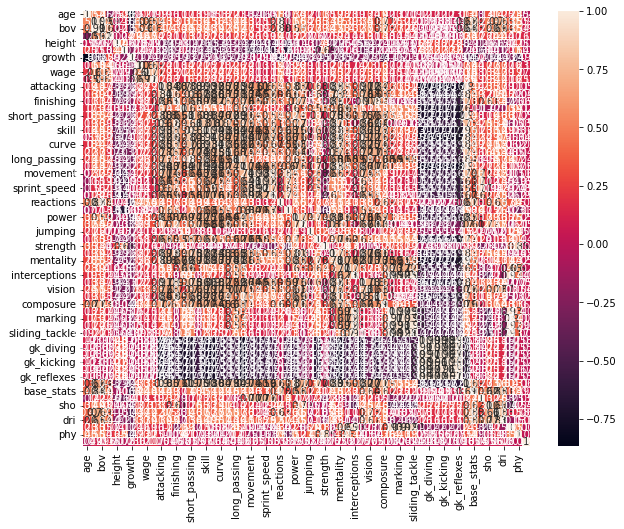

In [228]:
# Just to see the visual - goes wrong

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df2.corr(), mask=mask, annot=True)
plt.show()

<AxesSubplot:>

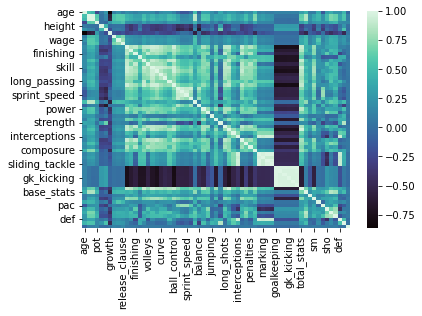

In [176]:
sns.heatmap(df2.corr(),cmap="mako")

In [229]:
# Here hoes the boxcox


def boxcox_transform(df2):
    numeric_cols = df2.select_dtypes(np.number).columns
    _ci = {column: None for column in numeric_cols}
    for column in numeric_cols:
        df2[column] = np.where(df2[column]<=0, np.NAN, df2[column]) 
        df2[column] = df2[column].fillna(df2[column].mean())
        transformed_data, ci = stats.boxcox(df2[column])
        df2[column] = transformed_data
        _ci[column] = [ci] 
    return df2, _ci

In [230]:
df2.dtypes

name                 object
age                   int64
ova                   int64
nationality          object
club                 object
bov                   int64
bp                   object
position             object
player_photo         object
club_logo            object
flag_photo           object
pot                   int64
team_&_contract      object
height              float64
weight              float64
foot                 object
growth                int64
joined               object
value               float64
wage                float64
release_clause      float64
contract             object
attacking             int64
crossing              int64
finishing             int64
heading_accuracy      int64
short_passing         int64
volleys             float64
skill                 int64
dribbling             int64
curve               float64
fk_accuracy           int64
long_passing          int64
ball_control          int64
movement              int64
acceleration        

In [231]:
df2, _ci = boxcox_transform(df2)
df2

,name,age,ova,nationality,club,bov,bp,position,player_photo,club_logo,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,gender
id,,,,,,,,,,,,,,,,,,,,,
16,Luis García,2.372979,51.506113,Spain,KAS Eupen,49.740147,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
41,Iniesta,2.361888,58.182409,Spain,Vissel Kobe,57.522112,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
80,E. Belözoğlu,2.383701,55.521687,Turkey,Fenerbahçe SK,54.294509,CM,CM CDM,https://cdn.sofifa.com/players/000/080/20_120.png,https://cdn.sofifa.com/teams/326/light_60.png,...,72+2,72+2,66+2,64+2,65+2,65+2,65+2,64+2,16+2,Male
330,R. Keane,2.350405,57.518401,Republic of Ireland,LA Galaxy,56.878205,CF,ST,https://cdn.sofifa.com/players/000/330/17_120.png,https://cdn.sofifa.com/teams/697/light_60.png,...,57+1,57+1,57+1,52+1,47+1,47+1,47+1,52+1,20+1,Male
1179,G. Buffon,2.423303,58.845651,Italy,Juventus,57.522112,GK,GK,https://cdn.sofifa.com/players/001/179/20_120.png,https://cdn.sofifa.com/teams/45/light_60.png,...,33+3,33+3,28+3,26+3,29+3,29+3,29+3,26+3,80+2,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,A. Medioub,2.148943,46.780831,France,CD Tondela,47.117395,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,https://cdn.sofifa.com/teams/112516/light_60.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
259090,W. Rickard,2.054324,41.320667,Wales,Burnley,41.822875,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
259091,C. Barrett,2.054324,41.320667,England,Burnley,40.488160,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,https://cdn.sofifa.com/teams/1796/light_60.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male


In [232]:
def remove_outliers(df2, threshold=1.5, in_columns=df2.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df2[column],75)
            lower = np.percentile(df2[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df2 = df2[(df[column]>lower_limit) & (df2[column]<upper_limit)]
    return df2

In [240]:
df3

,age,ova,bov,pot,height,weight,growth,value,wage,release_clause,...,gk_84+2,gk_84+3,gk_85+2,gk_86+2,gk_86+3,gk_87+2,gk_88+3,gk_89+3,gk_9+2,gender_Male
id,,,,,,,,,,,,,,,,,,,,,
16,2.372979,51.506113,49.740147,13.246518,602.817691,7.029014,4.558940,7.457322,6.037316,31.183057,...,0,0,0,0,0,0,0,0,0,1
41,2.361888,58.182409,57.522112,14.208821,1040.420108,7.121771,4.558940,8.457576,6.268475,37.813178,...,0,0,0,0,0,0,0,0,0,1
80,2.383701,55.521687,54.294509,13.832067,1040.420108,7.235665,4.558940,8.334596,6.780392,36.668588,...,0,0,0,0,0,0,0,0,0,1
330,2.350405,57.518401,56.878205,14.115593,1232.233921,7.260214,4.558940,8.457576,6.191574,36.040666,...,0,0,0,0,0,0,0,0,0,1
1179,2.423303,58.845651,57.522112,14.301428,1836.622352,7.722909,4.558940,8.288669,6.754127,35.259945,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,2.148943,46.780831,47.117395,13.045422,2135.916120,7.308527,2.838187,7.433409,5.453196,36.040666,...,0,0,0,0,0,0,0,0,0,1
259090,2.054324,41.320667,41.822875,12.737776,602.817691,7.367512,5.325697,7.006009,5.649733,20.530642,...,0,0,0,0,0,0,0,0,0,1
259091,2.054324,41.320667,40.488160,12.841149,1232.233921,7.173102,5.763826,7.006009,5.453196,20.530642,...,0,0,0,0,0,0,0,0,0,1


In [236]:
# dont know how to figure this 

df3 = df2.copy()

df3 = remove_outliers(df3, threshold=2,skip_columns=['wage']) # because this is the reality, outliers do exist in football for wages
df3

IndexError: index -1 is out of bounds for axis 0 with size 0

In [237]:
df3 = pd.get_dummies(df2)

In [238]:
# time to split

X = df3.drop('value', axis=1)
y = df3['value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [239]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [241]:
# Takes legit 10m to complete ahah

model.predict(X_test)

array([7.20086634, 8.08043209, 6.79347404, ..., 8.72556919, 8.19109273,
       6.46377291])

In [186]:
df3

,age,ova,bov,pot,height,weight,growth,value,wage,release_clause,...,gk_84+2,gk_84+3,gk_85+2,gk_86+2,gk_86+3,gk_87+2,gk_88+3,gk_89+3,gk_9+2,gender_Male
id,,,,,,,,,,,,,,,,,,,,,
16,2.372979,51.506113,49.740147,13.246518,602.817691,7.029014,4.558940,7.457322,6.037316,31.183057,...,0,0,0,0,0,0,0,0,0,1
41,2.361888,58.182409,57.522112,14.208821,1040.420108,7.121771,4.558940,8.457576,6.268475,37.813178,...,0,0,0,0,0,0,0,0,0,1
80,2.383701,55.521687,54.294509,13.832067,1040.420108,7.235665,4.558940,8.334596,6.780392,36.668588,...,0,0,0,0,0,0,0,0,0,1
330,2.350405,57.518401,56.878205,14.115593,1232.233921,7.260214,4.558940,8.457576,6.191574,36.040666,...,0,0,0,0,0,0,0,0,0,1
1179,2.423303,58.845651,57.522112,14.301428,1836.622352,7.722909,4.558940,8.288669,6.754127,35.259945,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259088,2.148943,46.780831,47.117395,13.045422,2135.916120,7.308527,2.838187,7.433409,5.453196,36.040666,...,0,0,0,0,0,0,0,0,0,1
259090,2.054324,41.320667,41.822875,12.737776,602.817691,7.367512,5.325697,7.006009,5.649733,20.530642,...,0,0,0,0,0,0,0,0,0,1
259091,2.054324,41.320667,40.488160,12.841149,1232.233921,7.173102,5.763826,7.006009,5.453196,20.530642,...,0,0,0,0,0,0,0,0,0,1


In [242]:
# MAE RMSE preparation
predictions = model.predict(X_test)

In [243]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.8507844345713195, 0.14597906892118195, 0.19595456871521932)

In [244]:
predictions = inv_boxcox(predictions, _ci['value'])

In [245]:
import math

results = pd.DataFrame()
results['vrai'] = inv_boxcox(y_test, _ci['value'])
results['pred'] = predictions
results['residu'] = results.apply(lambda x: abs(x['vrai'] - x['pred']), axis=1)
results

,vrai,pred,residu
id,,,
244049,2.100000e+05,2.447231e+05,3.472311e+04
193910,1.600000e+07,7.873578e+06,8.126422e+06
257409,1.200000e+05,6.798467e+04,5.201533e+04
219551,3.750000e+05,5.176798e+05,1.426798e+05
212750,3.750000e+05,3.391746e+05,3.582540e+04
...,...,...,...
245532,6.250000e+05,7.304592e+05,1.054592e+05
219985,1.300000e+07,2.254752e+07,9.547519e+06
193314,1.850000e+08,2.851827e+08,1.001827e+08


In [246]:
results.describe() # number looks very big so I describe it

,vrai,pred,residu
count,4.925000e+03,4.925000e+03,4.925000e+03
mean,1.563085e+07,2.790429e+07,2.507404e+07
std,3.888022e+07,3.711610e+08,3.568591e+08
min,1.000000e+04,1.703767e+04,6.153186e+01
25%,4.250000e+05,3.984820e+05,8.290800e+04
50%,8.750000e+05,1.487199e+06,6.717720e+05
75%,1.582965e+07,1.349908e+07,1.040220e+07
max,7.550000e+08,2.378064e+10,2.302564e+10


<AxesSubplot:xlabel='vrai', ylabel='pred'>

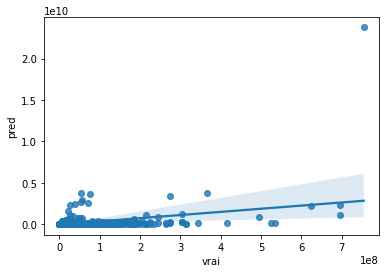

In [248]:
balance sns.regplot(results['vrai'], results['pred']) # seems like I have one value that is nonsense

In [256]:
df3['ova'].corr(df3['value']) # pretty good correlation --> not suprising cauz its a global value

0.8660872669579731

In [257]:
# attacking, finishing, growth, nationality, wage --> just want ot try with other varibales
df3['attacking'].corr(df3['value'])

0.5082344110142804

In [258]:
df3['finishing'].corr(df3['value'])

0.3356894887392788

In [260]:
df3['growth'].corr(df3['value'])

-0.3334275824855606

In [261]:
df3['wage'].corr(df3['value']) # --> pretty good relation which makes sense as well

0.6952964987004526